In [22]:
import os
import numpy as np
import pandas as pd

In [23]:
import matplotlib.pyplot as plt
import supervision as sv
import cv2
from sklearn.model_selection import train_test_split

In [24]:
main_path = "/root/Master_Thesis/"
sam_path = main_path + "sam/sam_vit_h_4b8939.pth"
raw_data_path = main_path + "data/raw/"
processed_data_path = main_path + "data/processed/"
oracle_path = processed_data_path +"oracle/"
dataframes_path = main_path + "data/dataframes/"

In [25]:
def create_df(images_path, masks_path, df_name=None):
    images =[]
    masks = []
    oracle=[]
    source = df_name.split("_df")[0]
    for dirname, _, filenames in os.walk(images_path):
        for filename in filenames:
            images.append(os.path.join(dirname, filename))
            masks.append(os.path.join(masks_path, filename))
            oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+filename.split('.')[0])))
    df = pd.DataFrame({"images": images,
                       "masks": masks,
                       "oracle":oracle})
    if not df_name is None:
        df.to_csv(dataframes_path + df_name)
    
    return df

In [26]:
##Get raw_paths and compose processed_paths

# brain_mri_path = raw_data_path + "Brain_MRI_segmentation/kaggle_3m/"

# brain_mri_processed_images_path = processed_data_path + "Brain_MRI_segmentation/images/"
# brain_mri_processed_masks_path = processed_data_path + "Brain_MRI_segmentation/masks/"
# oracle_path = processed_data_path + "Brain_MRI_segmentation/oracle/"

# images = []
# masks = []
# oracle = []
# processed_images = []
# processed_masks = []
# source = "brain"
# for dirname, _, filenames in os.walk(brain_mri_path):
#     for filename in filenames:
#         file = filename.split(".tif")[0]
#         if file.endswith("_mask"):
#             img_file = file[:-5] + ".tif"
#             masks.append(os.path.join(dirname, filename))
#             images.append(os.path.join(dirname, img_file))            
#             oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+file)))
            
#             processed_images.append(os.path.join(brain_mri_processed_images_path, "{}.npy".format(source+"_"+file)))
#             processed_masks.append(os.path.join(brain_mri_processed_masks_path, "{}.npy".format(source+"_"+file)))        

## Create and split a dataframe for previous paths                        
# brain_df = pd.DataFrame({"raw_images": images,
#                     "raw_masks": masks,
#                     "images": processed_images,
#                     "masks": processed_masks,                    
#                     "oracle":oracle})

# brain_df.to_csv(dataframes_path + "brain_df.csv")

# brain_df = pd.read_csv(dataframes_path+"brain_df.csv")
# brain_df_train, brain_df_test = train_test_split(brain_df, test_size=0.3, random_state=42, shuffle=True)
# brain_df_train.to_csv(dataframes_path+"brain_df_train.csv")
# brain_df_test.to_csv(dataframes_path+"brain_df_test.csv")


##Process images and masks and save them in corresponding paths
# for i in range(len(brain_df)):
#     processed_mask = cv2.resize(cv2.cvtColor(cv2.imread(brain_df["raw_masks"][i]), cv2.COLOR_BGR2GRAY), (128, 128), interpolation=cv2.INTER_CUBIC)
#     processed_image =  cv2.resize(cv2.cvtColor(cv2.imread(brain_df["raw_images"][i]), cv2.COLOR_BGR2RGB), (128, 128), interpolation=cv2.INTER_CUBIC)
    
#     processed_image_dir = os.path.dirname(brain_df["images"][i])
#     if not os.path.exists(processed_image_dir):
#         os.makedirs(processed_image_dir)
    
#     np.save(brain_df["images"][i], processed_image)
    
#     processed_mask_dir = os.path.dirname(brain_df["masks"][i])
#     if not os.path.exists(processed_mask_dir):
#         os.makedirs(processed_mask_dir)
    
#     np.save(brain_df["masks"][i], processed_mask)


In [27]:
# #Get raw_paths and compose processed_paths
# lung_dataset_path = raw_data_path + "Lung_Tumor_Segmentation/"

# lung_processed_images_path = processed_data_path + "Lung_Tumor_Segmentation/images/"
# lung_processed_masks_path = processed_data_path + "Lung_Tumor_Segmentation/masks/"
# oracle_path = processed_data_path + "Lung_Tumor_Segmentation/oracle/"

# images = []
# masks = []
# oracle = []
# processed_images = []
# processed_masks = []
# source = "lung"
# for dirname, _, filenames in os.walk(lung_dataset_path):
#     if dirname.endswith("data"):
#         mask_dir = dirname[:-4]
#         for filename in filenames:
#             mask_path = os.path.join(mask_dir, "masks", filename)
#             mask = np.load(mask_path, allow_pickle=True)
#             if mask.sum()>0:
#                 images.append(os.path.join(dirname, filename))
#                 masks.append(os.path.join(mask_dir, "masks", filename))
#                 oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+filename.split('.')[0])))
#                 processed_images.append(os.path.join(lung_processed_images_path, "{}.npy".format(source+"_"+filename.split('.')[0])))
#                 processed_masks.append(os.path.join(lung_processed_masks_path, "{}.npy".format(source+"_"+filename.split('.')[0])))
            
# # Create and split a dataframe for previous paths                        
# lung_df = pd.DataFrame({"raw_images": images,
#                     "raw_masks": masks,
#                     "images": processed_images,
#                     "masks": processed_masks,                    
#                     "oracle":oracle})

# lung_df.to_csv(dataframes_path + "lung_df.csv")

# lung_df = pd.read_csv(dataframes_path+"lung_df.csv")
# lung_df_train, lung_df_test = train_test_split(lung_df, test_size=0.3, random_state=42, shuffle=True)
# lung_df_train.to_csv(dataframes_path+"lung_df_train.csv")
# lung_df_test.to_csv(dataframes_path+"lung_df_test.csv")

# #Process images and masks and save them in corresponding paths
# for i in range(len(lung_df)):
#     processed_mask = cv2.resize(np.load(lung_df["raw_masks"][i], allow_pickle=True), (128, 128), interpolation=cv2.INTER_CUBIC)
#     processed_image = cv2.resize(cv2.cvtColor((np.load(lung_df["raw_images"][i], allow_pickle=True)* 255.0).astype(np.uint8), cv2.COLOR_GRAY2RGB), (128,128), interpolation=cv2.INTER_CUBIC)
    
#     processed_image_dir = os.path.dirname(lung_df["images"][i])
#     if not os.path.exists(processed_image_dir):
#         os.makedirs(processed_image_dir)
    
#     np.save(lung_df["images"][i], processed_image)
    
#     processed_mask_dir = os.path.dirname(lung_df["masks"][i])
#     if not os.path.exists(processed_mask_dir):
#         os.makedirs(processed_mask_dir)
    
#     np.save(lung_df["masks"][i], processed_mask)

In [28]:
# liver_path = raw_data_path + "Liver_and_Liver_Tumor_Segmentation/dataset_6/"
# old_liver_df = raw_data_path + "Liver_and_Liver_Tumor_Segmentation/lits_df.csv"
# df = pd.read_csv(old_liver_df)


# source = "liver"
# oracle=[]
# images_path = df["filepath"].to_list()
# images = [liver_path + path[18:] for path in images_path]
# print(images[0])

# tumor_mask_path = df["tumor_maskpath"].to_list()
# masks = [liver_path + path[18:] for path in tumor_mask_path]
# print(masks[0])

# for mask_path in masks:
#     file_name = os.path.basename(mask_path).split('.')[0]
#     oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+file_name)))

# # liver_mask_path = df["liver_maskpath"].to_list()
# # liver_masks = [liver_path + path[18:] for path in liver_mask_path]

# liver_df = pd.DataFrame({"images": images,
#                     "masks": masks,
#                     "oracle":oracle})

# liver_df.to_csv(dataframes_path + "liver_df.csv")

In [29]:
#Get raw_paths and compose processed_paths
lunar_raw_images_path = raw_data_path + "Lunar_Rocky_Landscape/images/render/"
lunar_raw_masks_path = raw_data_path + "Lunar_Rocky_Landscape/images/clean/"

lunar_processed_images_path = processed_data_path + "Lunar_Rocky_Landscape/images/"
lunar_processed_masks_path = processed_data_path + "Lunar_Rocky_Landscape/masks/"
oracle_path = processed_data_path + "Lunar_Rocky_Landscape/oracle/"


oracle = []
processed_images = []
processed_masks = []
source = "lunar"

images = [os.path.join(lunar_raw_images_path, x) for x in sorted(os.listdir(lunar_raw_images_path))]
masks = [os.path.join(lunar_raw_masks_path, x) for x in sorted(os.listdir(lunar_raw_masks_path))]

processed_images = [os.path.join(lunar_processed_images_path, os.path.basename(x)[:-3]+"npy") for x in images]
processed_masks = [os.path.join(lunar_processed_masks_path, os.path.basename(x)[:-3]+"npy") for x in masks]

oracle = [os.path.join(oracle_path, source+"_"+os.path.basename(x)[:-3]+"npy") for x in masks]

# # Create and split a dataframe for previous paths                        
lunar_df = pd.DataFrame({"raw_images": images,
                    "raw_masks": masks,
                    "images": processed_images,
                    "masks": processed_masks,                    
                    "oracle":oracle})

lunar_df.to_csv(dataframes_path + "lunar_df.csv")
lunar_df = pd.read_csv(dataframes_path+"lunar_df.csv")
lunar_df_train, lunar_df_test = train_test_split(lunar_df, test_size=0.3, random_state=42, shuffle=True)
lunar_df_train.to_csv(dataframes_path+"lunar_df_train.csv")
lunar_df_test.to_csv(dataframes_path+"lunar_df_test.csv")

# #Process images and masks and save them in corresponding paths
# for i in range(len(lunar_df)):
#     mask = cv2.imread(lunar_df["raw_masks"][i])
#     mask = mask[:,:,1]+ mask[:,:,0]
#     processed_mask = cv2.resize(mask, (128, 128), interpolation=cv2.INTER_CUBIC)
#     processed_image = cv2.resize(cv2.cvtColor(cv2.imread(lunar_df["raw_images"][i]), cv2.COLOR_BGR2RGB), (128,128), interpolation=cv2.INTER_CUBIC)
    
#     processed_image_dir = os.path.dirname(lunar_df["images"][i])
#     if not os.path.exists(processed_image_dir):
#         os.makedirs(processed_image_dir)
    
#     np.save(lunar_df["images"][i], processed_image)
    
#     processed_mask_dir = os.path.dirname(lunar_df["masks"][i])
#     if not os.path.exists(processed_mask_dir):
#         os.makedirs(processed_mask_dir)
    
#     np.save(lunar_df["masks"][i], processed_mask)

In [32]:
lunar_df["oracle"][1]

'/root/Master_Thesis/data/processed/Lunar_Rocky_Landscape/oracle/lunar_clean0002.npy'

In [10]:
len(not_found)

9766

In [43]:
set(mask.flatten())

{0, 255}

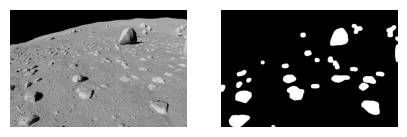

10


In [53]:

# idx=0
for i in range(idx, len(lunar_df)):
    # mask = cv2.cvtColor(cv2.imread(lunar_df["masks"][i]), cv2.COLOR_BGR2GRAY)
    mask = cv2.imread(lunar_df["masks"][i])
    mask = mask[:,:,1]+ mask[:,:,0]
    if mask.sum()>0:
        image = cv2.imread(lunar_df["images"][i])
        sv.plot_images_grid(
            images=[image, mask],
            grid_size=(1,2),
            size=(5,5)
        )
        idx = i+1
        print(i)
        break
    

In [56]:
image.shape

(480, 720, 3)

In [20]:
mask.shape

(256, 256, 3)

In [ ]:
# images = []
# masks = []
# oracle = []

# for dirname, _, filenames in os.walk(dataframes_path):
#     for filename in filenames:
#         if not filename in ["lung_df.csv", "train_df.csv", "test_df.csv", "all_dfs.csv", "aerial_df.csv", "clothing_df.csv", "liver_df.csv"]:
#             df = pd.read_csv(os.path.join(dirname, filename))
#             images.extend(df["images"].to_list())
#             masks.extend(df["masks"].to_list())
#             print(filename)
#             oracle.extend(df["oracle"].to_list())

# all_dfs = pd.DataFrame({"images": images,
#                         "masks": masks,
#                         "oracle": oracle})

# all_dfs.to_csv(dataframes_path + "all_dfs.csv")

# train_df, test_df = train_test_split(all_dfs, test_size=0.3, random_state=42, shuffle=True)
# train_df = train_df.reset_index(drop=True)
# test_df = test_df.reset_index(drop=True)
# train_df.to_csv(dataframes_path+"train_df.csv")
# test_df.to_csv(dataframes_path+"test_df.csv")